In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [12]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [13]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.12, random_state=42)

y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)


model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/10
413/413 [==============================] - 5s 9ms/step - loss: 0.2865 - accuracy: 0.9189 - val_loss: 0.1479 - val_accuracy: 0.9590
Epoch 2/10
413/413 [==============================] - 4s 9ms/step - loss: 0.1191 - accuracy: 0.9659 - val_loss: 0.1016 - val_accuracy: 0.9706
Epoch 3/10
413/413 [==============================] - 3s 8ms/step - loss: 0.0793 - accuracy: 0.9769 - val_loss: 0.0829 - val_accuracy: 0.9764
Epoch 4/10
413/413 [==============================] - 3s 8ms/step - loss: 0.0561 - accuracy: 0.9836 - val_loss: 0.0774 - val_accuracy: 0.9774
Epoch 5/10
413/413 [==============================] - 3s 8ms/step - loss: 0.0416 - accuracy: 0.9883 - val_loss: 0.0682 - val_accuracy: 0.9821
Epoch 6/10
413/413 [==============================] - 3s 8ms/step - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0706 - val_accuracy: 0.9796
Epoch 7/10
413/413 [==============================] - 3s 8ms/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0641 - val_accuracy: 0.9814
Epoch 

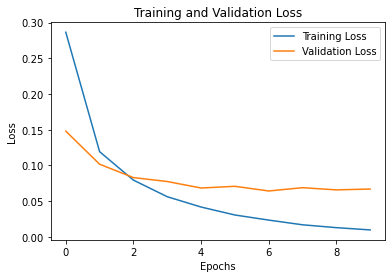

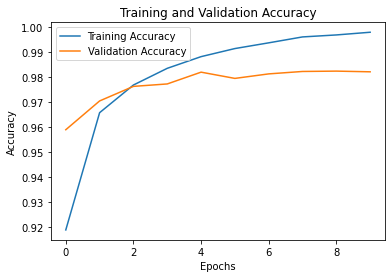

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


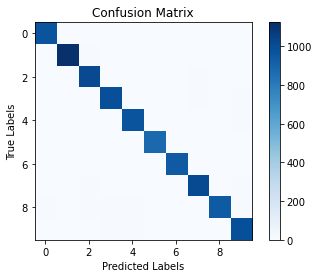

In [16]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_test_labels, y_pred_labels)


plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

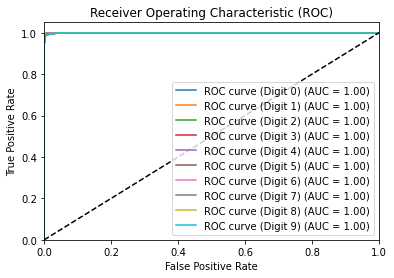

In [17]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve (Digit %d) (AUC = %0.2f)' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

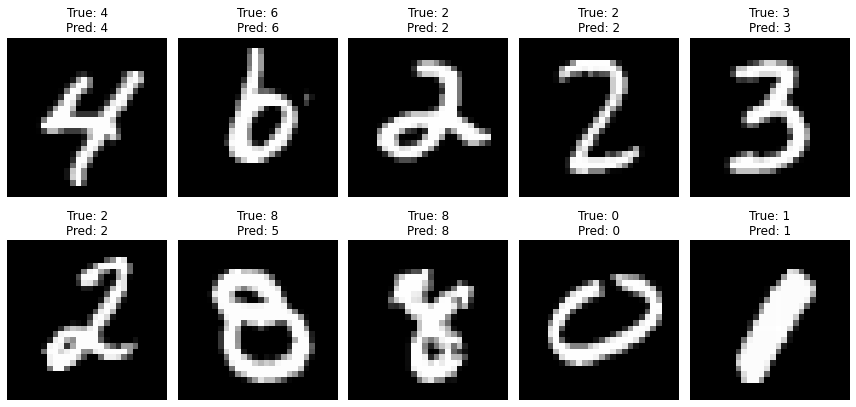

In [18]:
num_samples = 10
random_indices = np.random.choice(range(len(x_test)), num_samples, replace=False)
x_sample = x_test[random_indices]
y_sample_true = y_test[random_indices]

y_sample_pred = y_pred[random_indices]


fig, axes = plt.subplots(nrows=2, ncols=num_samples//2, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_sample[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {np.argmax(y_sample_true[i])}\nPred: {np.argmax(y_sample_pred[i])}')
    ax.axis('off')
plt.tight_layout()
plt.show()



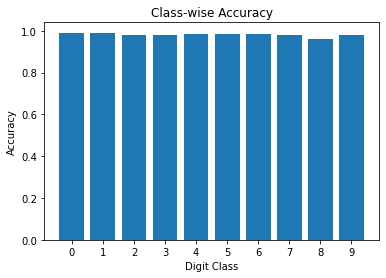

In [19]:
class_acc = np.diagonal(cm) / np.sum(cm, axis=1)

# Plot class-wise accuracy
plt.bar(range(10), class_acc)
plt.xticks(range(10), range(10))
plt.xlabel('Digit Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()